In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from numpy import concatenate

from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import *
import pickle

import h5py

mpl.rcParams['figure.figsize'] = (25,15)
mpl.rcParams["image.origin"] = 'lower'

#%matplotlib notebook

In [19]:
data_calo = np.load("data_calo.npy", mmap_mode="r")
data_nocalo = np.load("data_nocalo.npy", mmap_mode="r")

truth_calo = data_calo[:,:-1,:-1,3, np.newaxis]
input_calo = data_calo[:,:-1,:-1,:3]
truth_nocalo = data_nocalo[:,:-1,:-1,3, np.newaxis]
input_nocalo = data_nocalo[:,:-1,:-1,:3]

In [3]:
def plot(a,i):
    if i> 1:
        f, ax = plt.subplots(1,i, figsize=(25,15))
        for j in range(i):
            ax[j].imshow(a[:,:,j] ,cmap="Blues", norm=colors.LogNorm()) 
    else:
        plt.imshow(a[:,:,0], cmap="Blues", norm=colors.LogNorm())

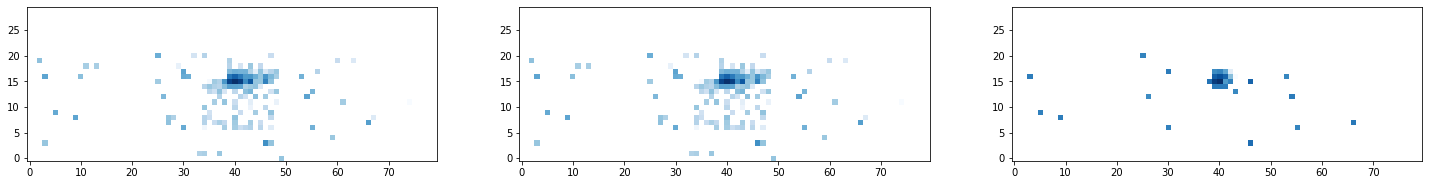

In [4]:
plot(input_calo[0], 3)

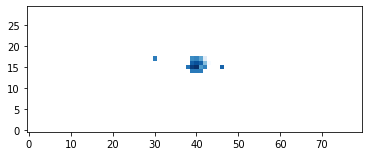

In [5]:
plot(truth_calo[0],1)

In [23]:
truth_calo_mask = np.array(truth_calo[:,:,:,0]>0 , dtype=int)[:,:,:,np.newaxis]
truth_calo_mask.shape

(7672, 30, 80, 1)

In [7]:
batch_size = 64  # Batch size for training.
ieta = input_calo.shape[1]
iphi = input_calo.shape[2]
channels = input_calo.shape[3]
epochs = 100  # Number of epochs to train for.
num_samples = len(input_calo)

In [8]:
# Import all the required Libraries
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras import backend as K

Using TensorFlow backend.


In [20]:
inp = Input((ieta,iphi,channels))
e = Conv2D(4, (4, 4), strides=2)(inp)
e = LeakyReLU(alpha = 0.2)(e)
e = Conv2D(4, (4, 4),strides=2)(e)
e = LeakyReLU(alpha = 0.2)(e)
l = Flatten()(e)
l = Dense(100, activation='softmax')(l)

#DECODER
d = Reshape((5,20,1))(l)
d = Conv2DTranspose(32,(3, 3), strides=2, padding='same')(d)
d = LeakyReLU(alpha = 0.2)(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(32,(3, 3),strides=(3,2), padding='same')(d)
d = LeakyReLU(alpha = 0.2)(d)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)

ae = Model(inp, decoded)
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 30, 80, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 39, 4)         196       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 39, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 18, 4)          260       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 6, 18, 4)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 432)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               43300     
__________

In [21]:
ae.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
ae.fit(x=input_calo, y = truth_calo_mask, batch_size=64, epochs = 50, validation_split= 0.15 )

Train on 6521 samples, validate on 1151 samples
Epoch 1/50
6521/6521 [==============================] - 25s 4ms/step - loss: 0.2466 - acc: 0.9864 - val_loss: 0.2061 - val_acc: 0.9954
Epoch 2/50
6521/6521 [==============================] - 25s 4ms/step - loss: 0.0319 - acc: 0.9954 - val_loss: 0.0492 - val_acc: 0.9954
Epoch 3/50
6521/6521 [==============================] - 25s 4ms/step - loss: 0.0315 - acc: 0.9954 - val_loss: 0.0335 - val_acc: 0.9954
Epoch 4/50
6521/6521 [==============================] - 24s 4ms/step - loss: 0.0311 - acc: 0.9954 - val_loss: 0.0320 - val_acc: 0.9954
Epoch 5/50
6521/6521 [==============================] - 24s 4ms/step - loss: 0.0304 - acc: 0.9954 - val_loss: 0.0380 - val_acc: 0.9954
Epoch 6/50
4224/6521 [==================>...........] - ETA: 7s - loss: 0.0272 - acc: 0.9954

KeyboardInterrupt: 

In [25]:
o = ae.predict(input_calo[0:190,:,:,:])

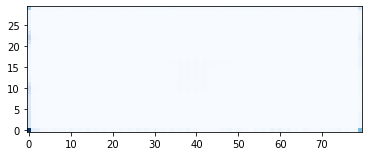

In [31]:
plt.imshow(o[14,:,:,0], cmap="Blues" )

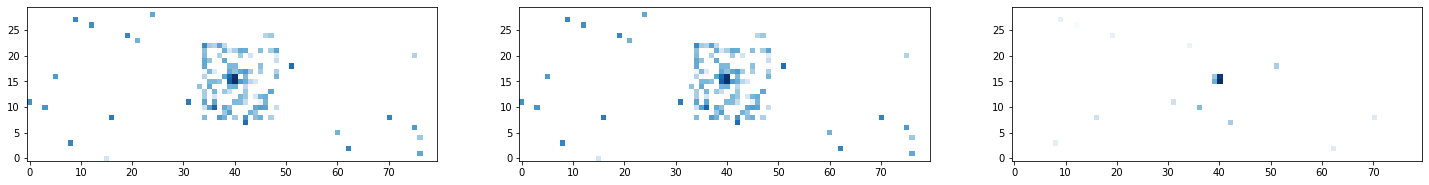

In [32]:
plot(input_calo[30], 3)

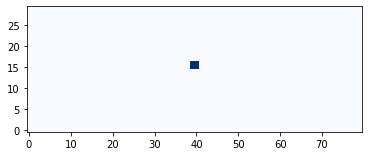

In [33]:
plt.imshow(truth_calo_mask[30,:,:,0], cmap="Blues")

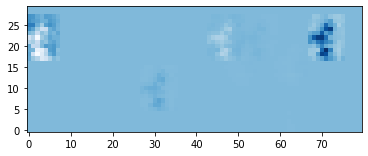

In [18]:
plt.imshow(o[4,:,:,0]-o[34,:,:,0], cmap="Blues")

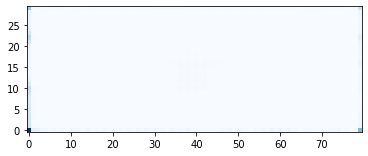

In [34]:
plt.imshow(o[30,:,:,0], cmap="Blues")